## 空き家問題


データ  
・統計局「住宅・土地統計調査 平成30年住宅・土地統計調査 住宅及び世帯に関する基本集計 全国・都道府県・市区町村 」

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [15]:
df = pd.read_csv("/content/drive/MyDrive/空き家/FEH_00200522_230330202410.csv")

UnicodeDecodeError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/空き家/FEH_00200522_230330202410.csv", encoding = "shift-jis")

In [ ]:
df.head()

In [ ]:
# 分析で使うデータのみ抽出
df1 = df.iloc[1:, 8:]

In [16]:
df1.head()

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   居住世帯あり   68 non-null     object
 1   同居世帯なし   68 non-null     object
 2   同居世帯あり   68 non-null     object
 3   居住世帯なし   68 non-null     object
 4   一時現在者のみ  68 non-null     object
 5   空き家      68 non-null     object
 6   二次的住宅    68 non-null     object
 7   別荘       68 non-null     object
 8   その他      68 non-null     object
 9   賃貸用の住宅   68 non-null     object
 10  売却用の住宅   68 non-null     object
 11  その他の住宅   68 non-null     object
 12  建築中      68 non-null     object
dtypes: object(13)
memory usage: 7.0+ KB


In [18]:
df1.astype(int)

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,317100,315300,1800,45000,900,43500,500,100,300,24900,1300,16900,700
65,481800,480300,1500,100000,1700,97700,4800,3200,1500,42100,2100,48700,600
66,460200,458100,2100,86200,1600,84200,1500,400,1000,30900,2000,49900,400
67,709000,705000,4000,170400,1900,167000,4200,2500,1700,53600,3900,105200,1500


In [19]:
df1 = df1.replace(',', '', regex=True)

In [20]:
df1.head()

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800


In [21]:
df1.astype(int)

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,317100,315300,1800,45000,900,43500,500,100,300,24900,1300,16900,700
65,481800,480300,1500,100000,1700,97700,4800,3200,1500,42100,2100,48700,600
66,460200,458100,2100,86200,1600,84200,1500,400,1000,30900,2000,49900,400
67,709000,705000,4000,170400,1900,167000,4200,2500,1700,53600,3900,105200,1500


In [22]:
# 「-」をいったん0で設定
df1 = df1.replace('-', 0, regex=True)

In [23]:
df1.astype(int)

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,317100,315300,1800,45000,900,43500,500,100,300,24900,1300,16900,700
65,481800,480300,1500,100000,1700,97700,4800,3200,1500,42100,2100,48700,600
66,460200,458100,2100,86200,1600,84200,1500,400,1000,30900,2000,49900,400
67,709000,705000,4000,170400,1900,167000,4200,2500,1700,53600,3900,105200,1500


In [24]:
df1 = df1.astype(int)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   居住世帯あり   68 non-null     int64
 1   同居世帯なし   68 non-null     int64
 2   同居世帯あり   68 non-null     int64
 3   居住世帯なし   68 non-null     int64
 4   一時現在者のみ  68 non-null     int64
 5   空き家      68 non-null     int64
 6   二次的住宅    68 non-null     int64
 7   別荘       68 non-null     int64
 8   その他      68 non-null     int64
 9   賃貸用の住宅   68 non-null     int64
 10  売却用の住宅   68 non-null     int64
 11  その他の住宅   68 non-null     int64
 12  建築中      68 non-null     int64
dtypes: int64(13)
memory usage: 7.0 KB


説明変数と目的変数の設定

In [26]:
x = df1.drop('空き家', axis=1)
y = df1['空き家']

学習用と検証用のデータで分ける

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

学習

In [28]:
reg = RandomForestRegressor()

In [29]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
y_pred_reg = reg.predict(x_test)

In [31]:
r2_score(y_test, y_pred_reg)

0.9908196219981209

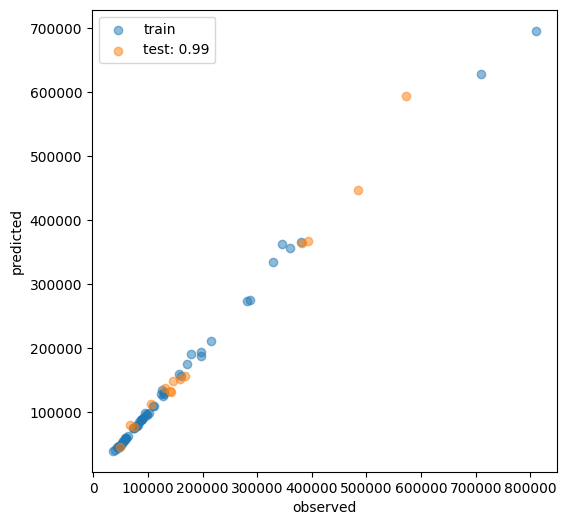

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, reg.predict(x_train), alpha = 0.5, label = "train")
plt.scatter(y_test, y_pred_reg, alpha = 0.5, label = "test: %.2f" %r2_score(y_test, y_pred_reg))
plt.xlabel("observed")
plt.ylabel("predicted")
plt.legend()

In [33]:
reg.feature_importances_

array([0.06317101, 0.10036158, 0.06062377, 0.3748963 , 0.01712462,
       0.00277928, 0.00435432, 0.09029612, 0.15046779, 0.07256208,
       0.05826125, 0.00510188])